# Demonstration
This is a demonstration of using `face-alignment` with S3FD as well as BlazeFace as backend. You will notice how BlazeFace speeds up the process significantly comparing to using the default face detector (S3FD)

In [21]:
import face_alignment
import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt

In [25]:
cap = cv2.VideoCapture('drive_video5.mp4')
frames = []
while True:
    success, frame = cap.read()
    if not success:
        break

    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frames.append(frame)


# Testing `face-alignment` with S3FD Face Detector

In [26]:
fa = face_alignment.FaceAlignment(face_alignment.LandmarksType.TWO_HALF_D, device='cpu', face_detector='sfd')

## Testing on single images

In [27]:
import time

t_start = time.time()
det = fa.get_landmarks_from_image(frames[0])
print(f'SFD: Execution time for a single image: {time.time() - t_start}')

SFD: Execution time for a single image: 3.2352659702301025


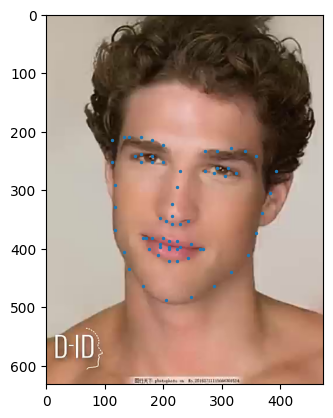

In [10]:
plt.imshow(frames[0])
for detection in det:
    plt.scatter(detection[:, 0], detection[:, 1], 2)

## Testing on a batch

In [28]:
batch = np.stack(frames)
batch = batch.transpose(0, 3, 1, 2)
batch = torch.Tensor(batch[:2])
t_start = time.time()
preds = fa.get_landmarks_from_batch(batch)
print(f'SFD: Execution time for a batch of 2 images: {time.time() - t_start}')

SFD: Execution time for a batch of 2 images: 10.48819613456726


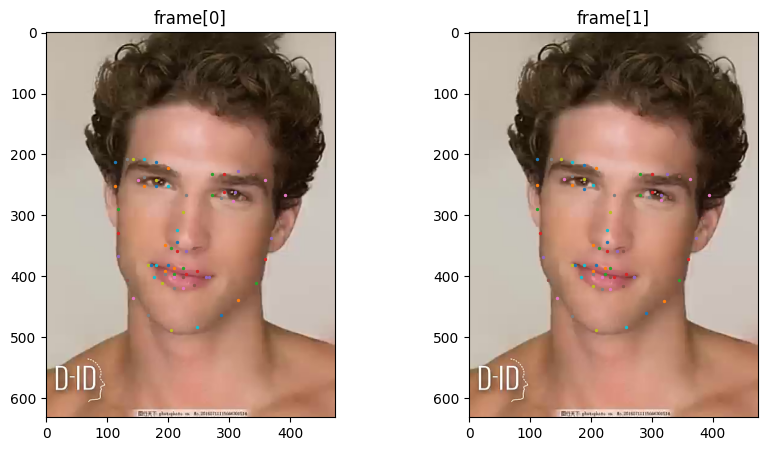

In [33]:
fig = plt.figure(figsize=(10, 5))
for i, pred in enumerate(preds):
    plt.subplot(1, 2, i + 1)
    plt.imshow(frames[1])
    plt.title(f'frame[{i}]')
    for detection in pred:
        plt.scatter(detection[0], detection[1], 2)


# Testing BlazeFace

In [35]:
fa = face_alignment.FaceAlignment(face_alignment.LandmarksType.TWO_D, device='cpu', face_detector='blazeface')

## Testing on single images

In [36]:
t_start = time.time()
preds = fa.get_landmarks_from_image(frames[0])
print(f'BlazeFace: Execution time for a single image: {time.time() - t_start}')

BlazeFace: Execution time for a single image: 1.121778964996338


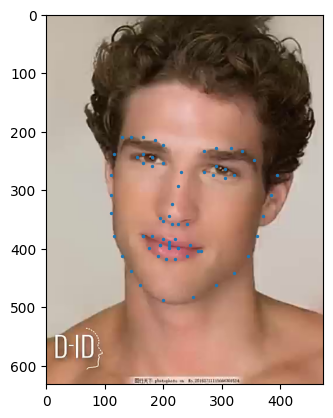

In [37]:
plt.imshow(frames[0])
for detection in preds:
    plt.scatter(detection[:, 0], detection[:, 1], 2)

## Testing on a Batch

In [38]:
batch = np.stack(frames)
batch = batch.transpose(0, 3, 1, 2)
batch = torch.Tensor(batch[:2])
t_start = time.time()
preds = fa.get_landmarks_from_batch(batch)
print(f'BlazeFace: Execution time for a batch of 2 images: {time.time() - t_start}')

BlazeFace: Execution time for a batch of 2 images: 4.882473945617676


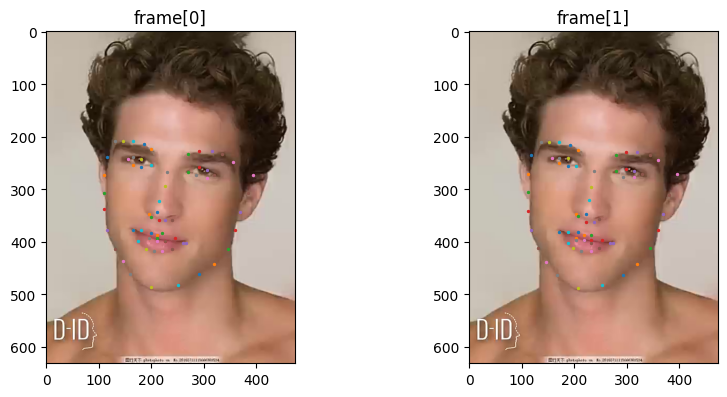

In [40]:
fig = plt.figure(figsize=(10, 25))

for i, pred in enumerate(preds):
    plt.subplot(5, 2, i + 1)
    plt.imshow(frames[i])
    plt.title(f'frame[{i}]')
    for detection in pred:
        plt.scatter(detection[0], detection[1], 2)
